In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import statistics
from statistics import mode
from sklearn.neighbors import KNeighborsClassifier 

## 2.1

In [55]:
# x = np.linspace(-2.0, 2.0, num = 40)
x,y = np.arange(-2,2.1,0.1),np.arange(-2,2.1,0.1)
# X,Y = np.mgrid[-2.0:2.1:0.1,-2.0:2.1:0.1]
grid  = []
for i in x:
    for j in y:
        grid.append([i,j])
df0 = pd.DataFrame(grid,columns = ['x1','x2'])

In [57]:
def OrganizeDataSpaces(X):
    df = pd.read_csv('HW3data/'+X, sep = ' ', names = ['x1', 'x2', 'class'])
    return df

In [75]:
df = OrganizeDataSpaces('D2z.txt')
knn = KNeighborsClassifier(n_neighbors = 1)
Xtrain = df.iloc[:,0:-1]
ytrain = df.iloc[:,-1]

knn.fit(Xtrain,ytrain)
predictions = knn.predict(df0)
df0['y'] = predictions.tolist()

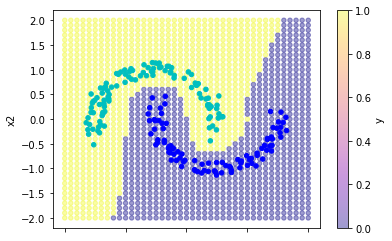

In [92]:

ax1 = df0.plot.scatter(x = 'x1', y = 'x2', c = 'y', colormap = 'plasma' , alpha = 0.4)
df.plot.scatter(x = 'x1', y = 'x2', c = df['class'].map({0:'b', 1:'c'}), ax = ax1 )
plt.savefig('D2z_Plot.pdf')

# add in colormap = 'plasma' or choose another scheme

## 2.2

In [5]:
# def OrganizeDataCommas(X):
#     df = pd.read_csv('HW3data/'+X, sep = ',', names = ['x1', 'x2', 'y'])
#     return df

def OrganizeDataCommas(X):
    df = pd.read_csv('HW3data/'+X, header = 0)
    return df


##### We want to implement a spam detection 1-Nearest Neighbor for both a single train/test split and a 5-fold cross validation

In [42]:
def Precision_and_Recall(TestData, Predictions):
    #(df TestData, np.array Predictions)
    
    true_positive_count = 0
    false_positive_count = 0
    false_negative_count = 0
    
    for i in range(len(Predictions)):

        if Predictions[i] == 1 and TestData.iloc[i,-1] == 1:
            true_positive_count = true_positive_count + 1

        if Predictions[i] == 1 and TestData.iloc[i,-1] != 1:
            false_positive_count = false_positive_count + 1

        if Predictions[i] == 0 and TestData.iloc[i,-1] == 1:
            false_negative_count = false_negative_count + 1 

    precision = true_positive_count/(true_positive_count + false_positive_count)
            # recall = TP/(TP + FN)
    recall = true_positive_count/(true_positive_count + false_negative_count)
    
    return f"Precision = {precision},  Recall = {recall}"
#     return [precision, recall]   

In [43]:
df = OrganizeDataCommas('emails.csv')
# 5-fold
Test1 = df.iloc[0:1000, :]
Train1 = df.drop(df.index[range(0,1000)])

Test2 = df.iloc[1000:2000, :]
Train2 = df.drop(df.index[range(1000,2000)])

Test3 = df.iloc[2000:3000, :]
Train3 = df.drop(df.index[range(2000,3000)])

Test4 = df.iloc[3000:4000, :]
Train4 = df.drop(df.index[range(3000,4000)])

Test5 = df.iloc[4000:5000, :]
Train5 = df.drop(df.index[range(4000,5000)])

neigh = KNeighborsClassifier(n_neighbors=1)

In [65]:
X1 = Train1.iloc[:,1:-1]
y1 = Train1.iloc[:,-1].to_numpy()
neigh.fit(X1, y1)
predict1 = neigh.predict(Test1.iloc[:,1:-1])
print('Accuracy = ', neigh.score(Test1.iloc[:,1:-1], Test1.iloc[:,-1]))
Precision_and_Recall(Test1,predict1)


Accuracy =  0.825


'Precision = 0.6544943820224719,  Recall = 0.8175438596491228'

In [67]:
X2 = Train2.iloc[:,1:-1]
y2 = Train2.iloc[:,-1].to_numpy()
neigh.fit(X2, y2)
predict2 = neigh.predict(Test2.iloc[:,1:-1])
print('Accuracy = ',neigh.score(Test2.iloc[:,1:-1], Test2.iloc[:,-1]))
Precision_and_Recall(Test2, predict2)

Accuracy =  0.853


'Precision = 0.6857142857142857,  Recall = 0.8664259927797834'

In [44]:
X3 = Train3.iloc[:,1:-1]
y3 = Train3.iloc[:,-1].to_numpy()
neigh.fit(X3, y3)
predict3 = neigh.predict(Test3.iloc[:,1:-1])
print('Accuracy = ',neigh.score(Test3.iloc[:,1:-1], Test3.iloc[:,-1]))
Precision_and_Recall(Test3,predict3)

Accuracy =  0.862


'Precision = 0.7212121212121212,  Recall = 0.8380281690140845'

In [69]:
X4 = Train4.iloc[:,1:-1]
y4 = Train4.iloc[:,-1].to_numpy()
neigh.fit(X4, y4)
predict4 = neigh.predict(Test4.iloc[:,1:-1])
print('Accuracy = ',neigh.score(Test4.iloc[:,1:-1], Test4.iloc[:,-1]))
Precision_and_Recall(Test4,predict4)

Accuracy =  0.851


'Precision = 0.7164179104477612,  Recall = 0.8163265306122449'

In [70]:
X5 = Train5.iloc[:,1:-1]
y5 = Train5.iloc[:,-1].to_numpy()
neigh.fit(X5, y5)
predict5 = neigh.predict(Test5.iloc[:,1:-1])
print('Accuracy = ',neigh.score(Test5.iloc[:,1:-1], Test5.iloc[:,-1]))
Precision_and_Recall(Test5,predict5)

Accuracy =  0.775


'Precision = 0.6057441253263708,  Recall = 0.7581699346405228'

In [92]:
# def PredictOutputClass(K, TestData_j, TrainData):
#     #  (int K, numpy array TestData_j, df TrainData)
#     # having taken some TestData_j, we need to calculate the nearest neighbors
#     # distances will be list of list = [index in TrainData, Euclidean Distance, Classification Value ]
#     distances = []
#     TestData_j  # will need to restructure this variable in final implementation
#     for i in range(len(TrainData)):
#         # take the i-th row, get rid of index and 'prediction' values 
#         # this allows us to calculate distance with numpy
#         # remember TrainData is a dataframe
#         x = TrainData.iloc[i,1:-1].to_numpy()
#         EucDist = np.sqrt(np.sum(np.square(TestData_j - x)))
#         # Get Classification Value (0 or 1)
#         OutputClass = TrainData.iloc[i,-1]
#         # (index in TrainData, Euclidean Distance, Classification Value )
#         distances.append([i,EucDist,OutputClass])
#     # now we have the list of list of distances (and index, output value info)  
#     distances.sort(key=lambda x: x[1])
# #     dist_df = pd.DataFrame(distances, name = ['Index', 'Distance', 'OutputClass'] )
# #     dist_df = dist_df.sort_values(by='Distance').reset_index(drop=True)
#     # we only care about the first K shortest distances (nearest neighbors)
#     distances = distances[0:K]
# #   we know want to determine K-nearest neighbors from sorted list of distances and OutputClass
#     OutputClassList = []
#     for row in distances:
#         # append OutputClass Value
#         OutputClassList.append(row[2])
#     # the mode of this list is the type we predict
#     class_prediction = mode(OutputClassList)
#     return class_prediction


In [91]:
# def K_NearestNeighbors(K, TestData, TrainData):
#     # (int K, df TestData, df TrainData)
    
#     EmailPredictions = []
#     count = 0
#     # list of lists = [[int row#, str Email #, int PredictOutputClass(), ActualOutputClass]]
#     for j in range(len(TestData)):
#         # take the i-th row of TestData and convert to numpy array
#         TestData_j = TestData.iloc[j,1:-1].to_numpy()
#         PredictedClass = PredictOutputClass(K, TestData_j, TrainData)
#         ActualOutputClass = TestData.iloc[j,-1]
#         EmailPredictions.append([j, TestData.iloc[j,0], PredictedClass, ActualOutputClass])
#         if PredictedClass == ActualOutputClass:
#             count = count + 1
#     accuracy = count/len(TestData)
       
#     return accuracy

In [90]:
# df = OrganizeDataCommas('emails.csv')
# TrainData = df.iloc[0:4000]
# TestData = df.iloc[4000:5000]
# K_NearestNeighbors(1,TestData,TrainData)

## 2.3

In [2]:
def GradientDescent(Eta, Theta, X, y):
    #( float Eta, Numpy Array Theta,  NumpyArray X, Int y )
    ThetaUpdate = Theta - Eta*(LogisticMap(np.dot(Theta,X)) - y)*X
    return ThetaUpdate
    
def LogisticMap(x):
    return 1/(1+np.exp(-1*x))

In [3]:
def OptimalTheta(Data, Eta, Iterations):
    #(df Data , LearningRate)
    CurrentIteration = 0
    # initialize theta to all zeros
    Theta = np.array([0]*len( Data.iloc[0,1:-1].to_numpy() ))
    while CurrentIteration < Iterations:
        # get optimal theta parameter
        for i in range(len(Data)):
            # input vector
            X = Data.iloc[i,1:-1].to_numpy()
            # output class
            y = Data.iloc[i,-1]
            Theta = GradientDescent(Eta, Theta, X, y)
        CurrentIteration += 1
    return Theta

In [4]:
def LogisticRegression(TrainData, TestData, Eta, Iterations):
    # (df TrainData, df TestData, float Eta)
    
    # Train for BestTheta using gradient descent
    BestTheta = OptimalTheta(TrainData, Eta, Iterations)
    
    correct_count = 0
    true_positive_count = 0
    false_positive_count = 0
    false_negative_count = 0
    # Now we want to run our predictions for y with our trained parameter Theta
    # and want to calculate accuracy, precision, and recall
    for i in range(len(TestData)):
        # get each email input vector in nunmpy array format
        X = TestData.iloc[i,1:-1].to_numpy()
        # numeric value of logistic map of inut vector with optimized theta
        prediction = LogisticMap(np.dot(BestTheta,X))
        
        # round prediciton to nearest binary value
        if prediction >= 0.5:
            prediction = 1
        else:
            prediction = 0
        
        if prediction == TestData.iloc[i,-1]:
            #increase count if correct prediction
            correct_count = correct_count + 1
        
        if prediction == 1 and TestData.iloc[i,-1] == 1:
            true_positive_count = true_positive_count + 1
        
        if prediction == 1 and TestData.iloc[i,-1] != 1:
            false_positive_count = false_positive_count + 1
        
        if prediction == 0 and TestData.iloc[i,-1] == 1:
            false_negative_count = false_negative_count + 1 
        
    
    accuracy = correct_count/len(TestData)
    # precision = TP/(TP + FP)
    precision = true_positive_count/(true_positive_count + false_positive_count)
    # recall = TP/(TP + FN)
    recall = true_positive_count/(true_positive_count + false_negative_count)
    
    
    return f"Accuracy = {accuracy}, Precision = {precision} Recall = {recall}"

In [178]:
df = OrganizeDataCommas('emails.csv')
# 5-fold
Test1 = df.iloc[0:1000, :]
Train1 = df.drop(df.index[range(0,1000)])

Test2 = df.iloc[1000:2000, :]
Train2 = df.drop(df.index[range(1000,2000)])

Test3 = df.iloc[2000:3000, :]
Train3 = df.drop(df.index[range(2000,3000)])

Test4 = df.iloc[3000:4000, :]
Train4 = df.drop(df.index[range(3000,4000)])

Test5 = df.iloc[4000:5000, :]
Train5 = df.drop(df.index[range(4000,5000)])


In [179]:
LogisticRegression(Train1, Test1, 0.1, 10)


/var/folders/nv/_v8zd9mj2pndpgy0wx_ydlg40000gn/T/ipykernel_48772/2989272038.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-1*x))


'Accuracy = 0.915, Precision = 0.9672897196261683 Recall = 0.7263157894736842'

In [181]:
LogisticRegression(Train2, Test2, 0.1, 10)


/var/folders/nv/_v8zd9mj2pndpgy0wx_ydlg40000gn/T/ipykernel_48772/2989272038.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-1*x))


'Accuracy = 0.909, Precision = 0.8940677966101694 Recall = 0.7617328519855595'

In [182]:
LogisticRegression(Train3, Test3, 0.1, 10)


/var/folders/nv/_v8zd9mj2pndpgy0wx_ydlg40000gn/T/ipykernel_48772/2989272038.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-1*x))


'Accuracy = 0.898, Precision = 0.9136363636363637 Recall = 0.7077464788732394'

In [183]:
LogisticRegression(Train4, Test4, 0.1,10)


/var/folders/nv/_v8zd9mj2pndpgy0wx_ydlg40000gn/T/ipykernel_48772/2989272038.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-1*x))


'Accuracy = 0.837, Precision = 0.9781021897810219 Recall = 0.4557823129251701'

In [184]:
LogisticRegression(Train5, Test5, 0.1, 10)

/var/folders/nv/_v8zd9mj2pndpgy0wx_ydlg40000gn/T/ipykernel_48772/2989272038.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-1*x))


'Accuracy = 0.873, Precision = 0.7737003058103975 Recall = 0.826797385620915'

## 2.4

In [6]:
df = OrganizeDataCommas('emails.csv')
# 5-fold
Test1 = df.iloc[0:1000, :]
Train1 = df.drop(df.index[range(0,1000)])

Test2 = df.iloc[1000:2000, :]
Train2 = df.drop(df.index[range(1000,2000)])

Test3 = df.iloc[2000:3000, :]
Train3 = df.drop(df.index[range(2000,3000)])

Test4 = df.iloc[3000:4000, :]
Train4 = df.drop(df.index[range(3000,4000)])

Test5 = df.iloc[4000:5000, :]
Train5 = df.drop(df.index[range(4000,5000)])

neigh1 = KNeighborsClassifier(n_neighbors=1)
neigh3 = KNeighborsClassifier(n_neighbors=3)
neigh5 = KNeighborsClassifier(n_neighbors=5)
neigh7 = KNeighborsClassifier(n_neighbors=7)
neigh10 = KNeighborsClassifier(n_neighbors=10)



In [7]:
X1 = Train1.iloc[:,1:-1]
y1 = Train1.iloc[:,-1].to_numpy()
neigh1.fit(X1, y1)
neigh3.fit(X1, y1)
neigh5.fit(X1, y1)
neigh7.fit(X1, y1)
neigh10.fit(X1, y1)

predict1 = neigh1.predict(Test1.iloc[:,1:-1])
predict3 = neigh3.predict(Test1.iloc[:,1:-1])
predict5 = neigh5.predict(Test1.iloc[:,1:-1])
predict7 = neigh7.predict(Test1.iloc[:,1:-1])
predict10 = neigh10.predict(Test1.iloc[:,1:-1])

Fold1_Accuracies = [neigh1.score(Test1.iloc[:,1:-1], Test1.iloc[:,-1]),
    neigh3.score(Test1.iloc[:,1:-1], Test1.iloc[:,-1]),
    neigh5.score(Test1.iloc[:,1:-1], Test1.iloc[:,-1]),
    neigh7.score(Test1.iloc[:,1:-1], Test1.iloc[:,-1]),
    neigh10.score(Test1.iloc[:,1:-1], Test1.iloc[:,-1])]

In [8]:
X2 = Train2.iloc[:,1:-1]
y2 = Train2.iloc[:,-1].to_numpy()
neigh1.fit(X2, y2)
neigh3.fit(X2, y2)
neigh5.fit(X2, y2)
neigh7.fit(X2, y2)
neigh10.fit(X2, y2)

predict1 = neigh1.predict(Test2.iloc[:,1:-1])
predict3 = neigh3.predict(Test2.iloc[:,1:-1])
predict5 = neigh5.predict(Test2.iloc[:,1:-1])
predict7 = neigh7.predict(Test2.iloc[:,1:-1])
predict10 = neigh10.predict(Test2.iloc[:,1:-1])

Fold2_Accuracies = [neigh1.score(Test2.iloc[:,1:-1], Test2.iloc[:,-1]),
    neigh3.score(Test2.iloc[:,1:-1], Test2.iloc[:,-1]),
    neigh5.score(Test2.iloc[:,1:-1], Test2.iloc[:,-1]),
    neigh7.score(Test2.iloc[:,1:-1], Test2.iloc[:,-1]),
    neigh10.score(Test2.iloc[:,1:-1], Test2.iloc[:,-1])]

In [9]:
X3 = Train3.iloc[:,1:-1]
y3 = Train3.iloc[:,-1].to_numpy()
neigh1.fit(X3, y3)
neigh3.fit(X3, y3)
neigh5.fit(X3, y3)
neigh7.fit(X3, y3)
neigh10.fit(X3, y3)

predict1 = neigh1.predict(Test3.iloc[:,1:-1])
predict3 = neigh3.predict(Test3.iloc[:,1:-1])
predict5 = neigh5.predict(Test3.iloc[:,1:-1])
predict7 = neigh7.predict(Test3.iloc[:,1:-1])
predict10 = neigh10.predict(Test3.iloc[:,1:-1])

Fold3_Accuracies = [neigh1.score(Test3.iloc[:,1:-1], Test3.iloc[:,-1]),
    neigh3.score(Test3.iloc[:,1:-1], Test3.iloc[:,-1]),
    neigh5.score(Test3.iloc[:,1:-1], Test3.iloc[:,-1]),
    neigh7.score(Test3.iloc[:,1:-1], Test3.iloc[:,-1]),
    neigh10.score(Test3.iloc[:,1:-1], Test3.iloc[:,-1])]

In [10]:
X4 = Train4.iloc[:,1:-1]
y4 = Train4.iloc[:,-1].to_numpy()
neigh1.fit(X4, y4)
neigh3.fit(X4, y4)
neigh5.fit(X4, y4)
neigh7.fit(X4, y4)
neigh10.fit(X4, y4)

predict1 = neigh1.predict(Test4.iloc[:,1:-1])
predict3 = neigh3.predict(Test4.iloc[:,1:-1])
predict5 = neigh5.predict(Test4.iloc[:,1:-1])
predict7 = neigh7.predict(Test4.iloc[:,1:-1])
predict10 = neigh10.predict(Test4.iloc[:,1:-1])

Fold4_Accuracies = [neigh1.score(Test4.iloc[:,1:-1], Test4.iloc[:,-1]),
    neigh3.score(Test4.iloc[:,1:-1], Test4.iloc[:,-1]),
    neigh5.score(Test4.iloc[:,1:-1], Test4.iloc[:,-1]),
    neigh7.score(Test4.iloc[:,1:-1], Test4.iloc[:,-1]),
    neigh10.score(Test4.iloc[:,1:-1], Test4.iloc[:,-1])]

In [11]:
X5 = Train5.iloc[:,1:-1]
y5 = Train5.iloc[:,-1].to_numpy()
neigh1.fit(X5, y5)
neigh3.fit(X5, y5)
neigh5.fit(X5, y5)
neigh7.fit(X5, y5)
neigh10.fit(X5, y5)

predict1 = neigh1.predict(Test5.iloc[:,1:-1])
predict3 = neigh3.predict(Test5.iloc[:,1:-1])
predict5 = neigh5.predict(Test5.iloc[:,1:-1])
predict7 = neigh7.predict(Test5.iloc[:,1:-1])
predict10 = neigh10.predict(Test5.iloc[:,1:-1])

Fold5_Accuracies = [neigh1.score(Test5.iloc[:,1:-1], Test5.iloc[:,-1]),
    neigh3.score(Test5.iloc[:,1:-1], Test5.iloc[:,-1]),
    neigh5.score(Test5.iloc[:,1:-1], Test5.iloc[:,-1]),
    neigh7.score(Test5.iloc[:,1:-1], Test5.iloc[:,-1]),
    neigh10.score(Test5.iloc[:,1:-1], Test5.iloc[:,-1])]

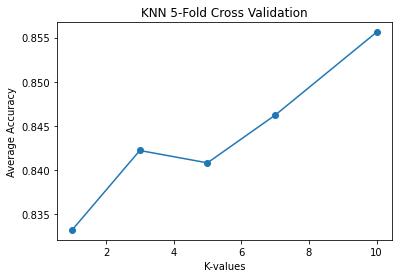

In [13]:
CrossValidationAccuracies = [Fold1_Accuracies, Fold2_Accuracies, Fold3_Accuracies,
                             Fold4_Accuracies, Fold5_Accuracies]
CrossValidationAccuracies = np.array(CrossValidationAccuracies)
AvgAcc = []
k_val = [1,3,5,7,10]

for i in range(5):
    AvgAcc.append(np.average(CrossValidationAccuracies.T[i]))

plt.plot(k_val,AvgAcc, marker = 'o')
plt.xlabel('K-values')
plt.ylabel('Average Accuracy')
plt.title('KNN 5-Fold Cross Validation')

plt.savefig('KNN_5Fold_CrossValidation.pdf')

## 2.5

In [29]:
df = OrganizeDataCommas('emails.csv')

In [30]:
TrainSplit = df.iloc[:4000]
X5 = TrainSplit.iloc[:,1:-1]
y5 = TrainSplit.iloc[:,-1]
TestSplit = df.iloc[4000:5000]

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X5,y5)
# predict values with model
predict5 = knn.predict(TestSplit.iloc[:,1:-1])
y_scores = knn.predict_proba(TestSplit.iloc[:,1:-1])

LogReg = sklearn.linear_model.LogisticRegression(random_state=0, max_iter=1000).fit(X5,y5)


In [31]:
y_scores2 = LogReg.predict_proba(TestSplit.iloc[:,1:-1])

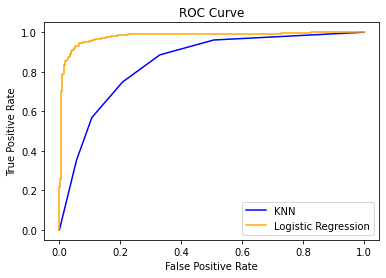

In [34]:
plt.figure()
fpr, tpr, thresholds = sklearn.metrics.roc_curve(TestSplit.iloc[:,-1], y_scores[:,1])
plt.plot(fpr, tpr, color = 'Blue', label = 'KNN')

fpr2, tpr2, thresholds2 = sklearn.metrics.roc_curve(TestSplit.iloc[:,-1], y_scores2[:,1])
plt.plot(fpr2, tpr2, color = 'Orange', label = 'Logistic Regression')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.savefig('ROC_Curve.pdf')

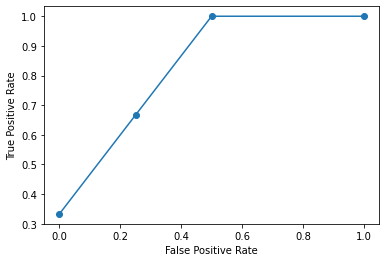

In [102]:
x = [2/6, 4/6, 1, 1]
y = [0, 1/4, 2/4, 1]

plt.plot(y,x, marker = 'o')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('Part1_Q5.pdf')

[0, 0.25, 0.5, 1]